Load historical stock data for a given ticker symbol
We start by loading historical stock data for NVIDIA (ticker symbol "NVDA") from Yahoo Finance. This helps us get the historical prices of the stock to perform further analysis.

In [1]:
import math
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

This code uses the yfinance library to download stock data for NVIDIA starting from January 1, 2023. 
The data is stored in a pandas DataFrame named data.
 This DataFrame contains various columns such as 'Open', 'High', 'Low', 'Close', 'Volume', and 'Adj Close', which represent different aspects of the stock's daily performance.

Display the first few rows of the data
Next, we display the first few rows of the data to understand its structure and the kind of information it holds

In [3]:
data = yf.download( 'NVDA', start = '2023-01-01' )
data.head()
                   

C:\Users\PCMANIA\AppData\Local\Temp\ipykernel_47100\1312573177.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download( 'NVDA', start = '2023-01-01' )
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-01-03,14.302286,14.982682,14.083481,14.837810,401277000
2023-01-04,14.735902,14.839810,14.228354,14.554064,431324000
2023-01-05,14.252333,14.551067,14.135436,14.478132,389168000
2023-01-06,14.845803,14.996669,14.021536,14.461145,405044000
2023-01-09,15.614120,16.041740,15.127553,15.270426,504231000


The head() function in pandas displays the first five rows of the DataFrame by default.
 This allows us to quickly inspect the data and verify that it has been loaded correctly. 
 We can see the dates as the index and the columns representing different metrics such as opening price, closing price, highest price, lowest price, and volume for each trading day.

Calculate moving averages and other indicators
Now, we calculate the 20-day and 50-day simple moving averages (SMA) of the stock's closing price.
 We also calculate the historical volatility and the percentile rank of the closing prices.

In [4]:
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['vol']  = data['Close'].pct_change().rolling(window = 21).std()  * math.sqrt(252)
data['pct_rank']  = data['Close'].rolling(window=21).rank(pct=True) 

We calculate the 20-day and 50-day simple moving averages by using the rolling method with a specified window and then applying the mean function. 
We compute historical volatility by taking the standard deviation of the daily returns over a 21-day window and then annualizing it using the square root of 252 (number of trading days in a year).

Finally, the percentile rank of the closing prices over a 21-day window is calculated using the rank method with the pct parameter set to True, giving us a value between 0 and 1.

Plot the stock's closing price and moving averages
Next, we plot the stock's closing price along with the 20-day and 50-day simple moving averages to visualize trends and patterns.

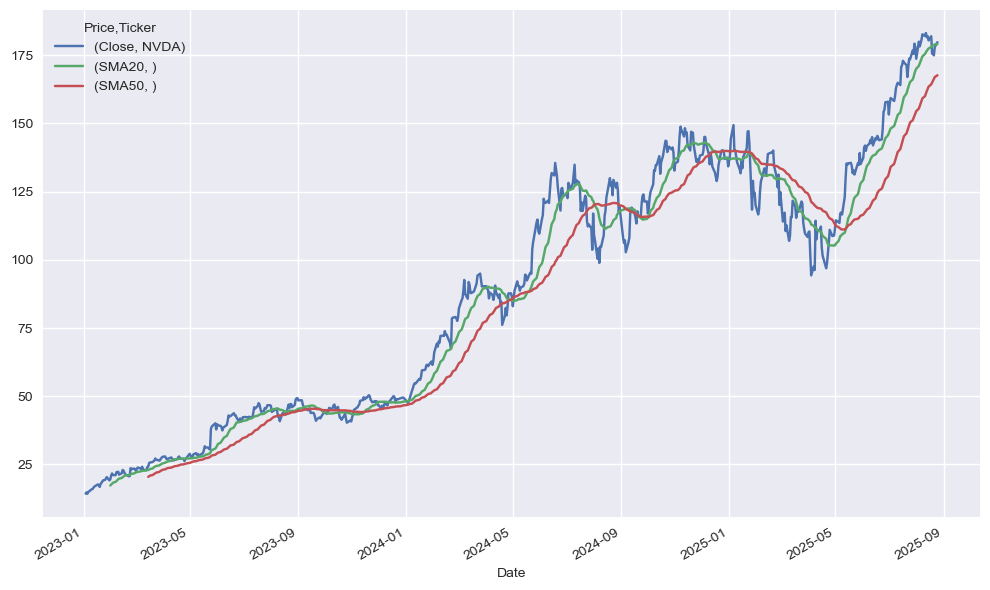

In [9]:
to_plot = ['Close', 'SMA20', 'SMA50']
data[to_plot].plot(figsize=(10,6))
plt.style.use('seaborn-v0_8')
plt.tight_layout()

We store the columns to be plotted (closing price, 20-day SMA, and 50-day SMA) in a list named to_plot. 
Using pandas' plot method, we create a line plot for these columns.

This visual representation helps us see how the stock's price moves relative to its short-term and long-term trends defined by the moving averages.

Plot historical volatility
We then plot the historical volatility of the stock to understand its risk and price fluctuations over time.

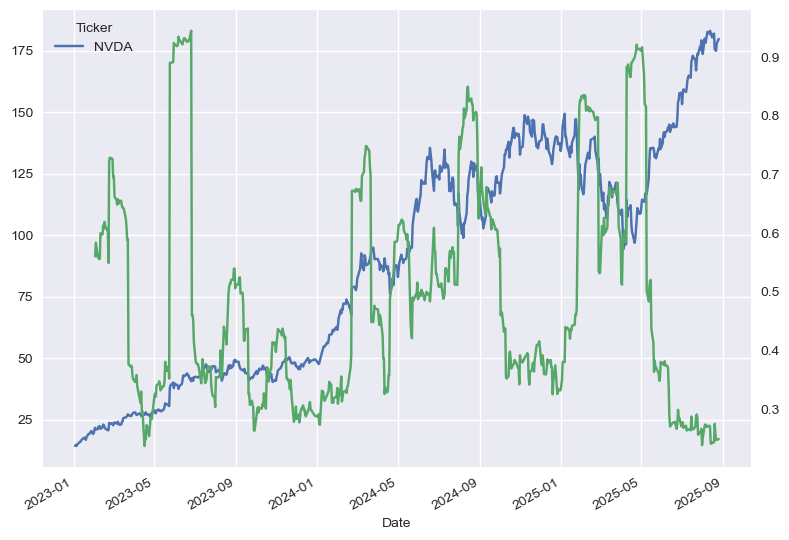

In [ ]:
ax = data['Close'].plot()
data['vol'].plot(secondary_y=True, ax=ax)
plt.show( )

This code creates a line plot showing both the closing price and the computed historical volatility.

By plotting these together, we can see how the stock's volatility changes over time and how it correlates with the price movements. 
Higher volatility indicates higher risk and larger price swings, while lower volatility suggests more stable price behavior.

Plot the percentile rank over time
Finally, we plot the percentile rank of the closing prices to see how the current price compares to its historical range.

<Axes: xlabel='Date'>

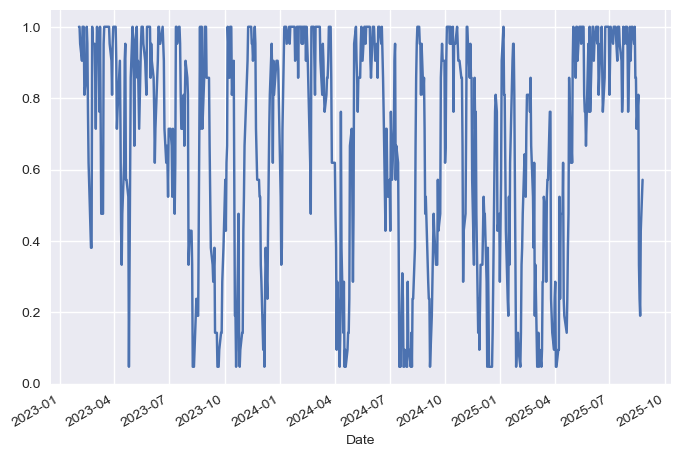

In [12]:
data['pct_rank'].plot()

We use the plot method to visualize the percentile rank of the closing prices. 
This plot shows how the current price ranks within a specified window of past prices.


A high percentile rank indicates that the current price is relatively high compared to its historical range, 
while a low percentile rank suggests that it is relatively low. 
This can help identify overbought or oversold conditions in the stock.